## Analyse et Prédiction du Risque de Diabète


 Ce projet vise à segmenter les données de patients à risque de diabète en utilisant des modèles de clustering (comme K-Means). Une classification supervisée est ensuite appliquée pour prédire le risque de diabète avec précision, en évaluant plusieurs algorithmes (Random Forest, SVM, etc.) et en optimisant leurs performances.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df =  pd.read_csv("dataset-diabete.csv")

print(df)

     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        0            6      148             72             35        0  33.6   
1        1            1       85             66             29        0  26.6   
2        2            8      183             64              0        0  23.3   
3        3            1       89             66             23       94  28.1   
4        4            0      137             40             35      168  43.1   
..     ...          ...      ...            ...            ...      ...   ...   
763    763           10      101             76             48      180  32.9   
764    764            2      122             70             27        0  36.8   
765    765            5      121             72             23      112  26.2   
766    766            1      126             60              0        0  30.1   
767    767            1       93             70             31        0  30.4   

     DiabetesPedigreeFuncti

In [3]:
df.drop(columns=['index'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Analyser la structure

In [4]:
df.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
print(df)

     index  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        0            6      148             72             35        0  33.6   
1        1            1       85             66             29        0  26.6   
2        2            8      183             64              0        0  23.3   
3        3            1       89             66             23       94  28.1   
4        4            0      137             40             35      168  43.1   
..     ...          ...      ...            ...            ...      ...   ...   
763    763           10      101             76             48      180  32.9   
764    764            2      122             70             27        0  36.8   
765    765            5      121             72             23      112  26.2   
766    766            1      126             60              0        0  30.1   
767    767            1       93             70             31        0  30.4   

     DiabetesPedigreeFuncti

In [10]:
print(df.isnull().sum())


index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [11]:
print("Nombre de doublons :", df.duplicated().sum())


Nombre de doublons : 0


Analyser la distribution des variables numériques.

In [13]:
df_numeriques =  df.select_dtypes(include =['int','float'])
df_categoriques = df.select_dtypes(include=["object"])


In [15]:
df_numeriques.describe()


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Créer la matrice de corrélation

In [17]:
correlation_matrix = df_numeriques.corr()

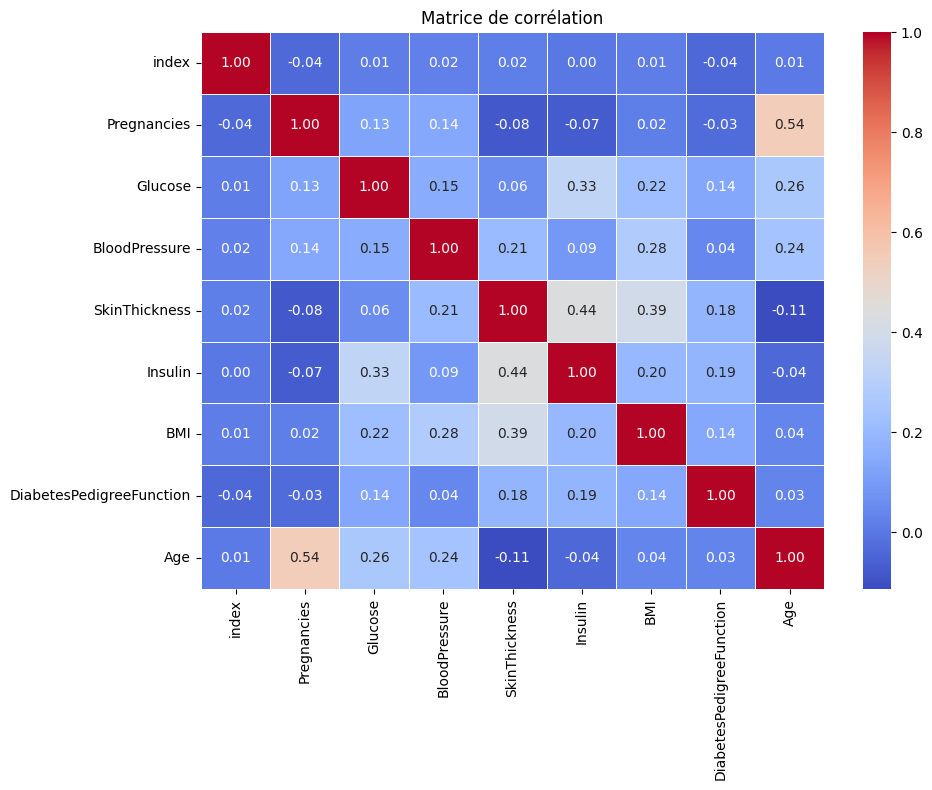

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()
